<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : Amirreza Bagheri Delouee
### Student Number : 98109804
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [2]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [3]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.reg = reg
        self.alpha = alpha
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W': initializer(dim_in, dim_out),
            'b': np.zeros((1, dim_out))
        }
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        x_reshaped = x.reshape(x.shape[0], -1)
        y = x_reshaped @ self.params['W'].T + self.params['b']
        self.cache['x'] = x
        
        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        x, w, b = self.cache['x'], self.params['W'], self.params['b']
        
        x_reshaped = x.reshape(x.shape[0], -1)
        grad_b = np.sum(upstream, axis=0, keepdims=True)
        grad_w = upstream.T @ x_reshaped
        grad_x = (upstream @ w).reshape(x.shape)
        grad_reg = int(self.reg) * 2 * self.alpha * w

        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg
        }


In [4]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(y, x))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

#### ReLU Layer (5 Points)

In [5]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = np.maximum(0, x)
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        x = self.cache['x']
        grad_x = (x > 0) * upstream
        
        self.grads['x'] = grad_x


In [6]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [7]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    #########################################
    ##              Your Code              ##
    #########################################
    if (axis == 1):
        return np.logaddexp.reduce(array.T, dtype=float)
    return np.logaddexp.reduce(array, dtype=float)
    pass

In [8]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = (x.T - logsumexp(x, axis=1)).T
        self.cache['x'] = x
        self.cache['y'] = y
        
        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y_exp = np.exp(self.cache['y'])
        grad_x = upstream - y_exp * np.sum(upstream, axis=1)[:, None]
        self.grads['x'] = grad_x


In [9]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [10]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        output = self.layers[0]._forward(x)
        for layer in self.layers[1:]:
            output = layer._forward(output)
        return output
        pass
    
    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in reversed(self.layers):
            layer.backward(upstream)
            upstream = layer.grads['x']
            
        pass

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        parametric_layers = []
        for layer in self.layers:
            try:
                params = layer.params
                parametric_layers.append(layer)
            except Exception as e:
                continue
        return parametric_layers
        pass

## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [11]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        true_values = np.eye(logprobs.shape[1])[targets]
        y = -np.sum(true_values * logprobs)
        if (self.mean):
            y /= logprobs.shape[0]
        self.cache['true_values'] = true_values
        
        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        true_values = self.cache['true_values']
        grad_scores = - true_values * upstream
        if (self.mean):
            grad_scores /= true_values.shape[0]
        
        self.grads['x'] = grad_scores

In [12]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[-0. -1. -0. -0. -0.]
 [-0. -0. -0. -1. -0.]
 [-0. -0. -0. -0. -1.]
 [-1. -0. -0. -0. -0.]
 [-1. -0. -0. -0. -0.]
 [-0. -1. -0. -0. -0.]
 [-0. -0. -0. -0. -1.]
 [-0. -1. -0. -0. -0.]
 [-0. -1. -0. -0. -0.]
 [-0. -0. -0. -0. -1.]]
Relative error of delta-loss:
2.771220752873717e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [13]:
class Optimizer():
    """
    Our main optimization class.
    
    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self):
        """
        Perform sgd update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            try:
                params = layer.params
                layer.params['W'] -= self.lr * (layer.grads['W'] + layer.grads['reg'])
                layer.params['b'] -= self.lr * layer.grads['b']
            except Exception as e:
                continue
        pass
    
    def _momentum(self):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        pass


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [14]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################

!./cifar10_downloader.bash

'.' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [16]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
indices = list(range(len(data['X_train'])))
np.random.shuffle(indices)
train_proportion = 0.8

data['X_val'] = data['X_train'][indices[int(train_proportion * len(indices)): ]]
data['Y_val'] = data['Y_train'][indices[int(train_proportion * len(indices)): ]]
data['X_train'] = data['X_train'][indices[: int(train_proportion * len(indices))]]
data['Y_train'] = data['Y_train'][indices[: int(train_proportion * len(indices))]]
##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3200, 32, 32, 3)
Y_train: (3200,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (800, 32, 32, 3)
Y_val: (800,)


<Figure size 640x480 with 0 Axes>

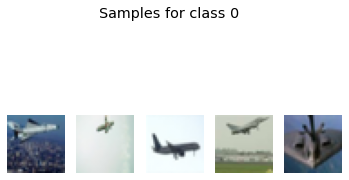

<Figure size 640x480 with 0 Axes>

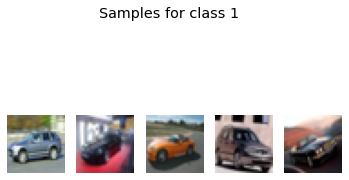

<Figure size 640x480 with 0 Axes>

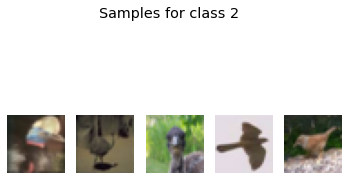

<Figure size 640x480 with 0 Axes>

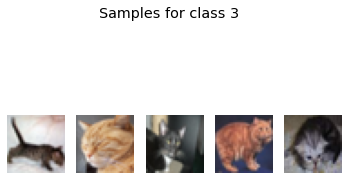

<Figure size 640x480 with 0 Axes>

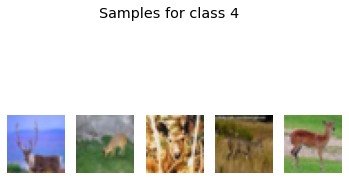

<Figure size 640x480 with 0 Axes>

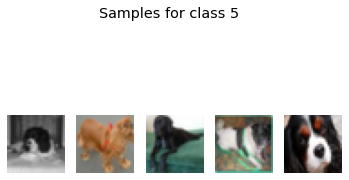

<Figure size 640x480 with 0 Axes>

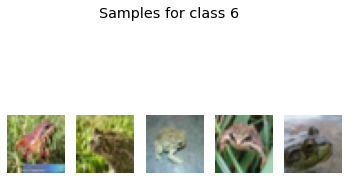

<Figure size 640x480 with 0 Axes>

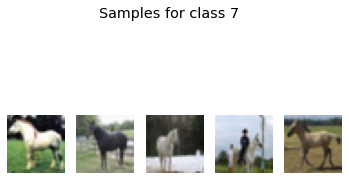

<Figure size 640x480 with 0 Axes>

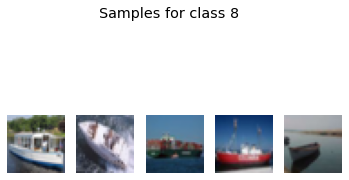

<Figure size 640x480 with 0 Axes>

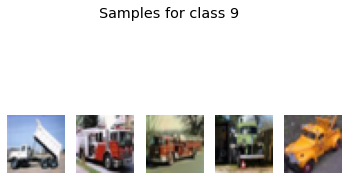

In [17]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
num_samples = 5
for label in np.unique(data['Y_train']):
    sample_indices, = np.where(data['Y_train'] == label)
    samples = data['X_train'][np.random.choice(sample_indices, 5, replace=False)]
    
    plt.figure(figsize=(8, 6), dpi=80)
    f, axes = plt.subplots(1, num_samples)
    f.suptitle(f"Samples for class {label}", fontsize="x-large")
    
    axes[0].imshow(samples[0].reshape((32, 32, 3)));
    axes[0].axis('off')

    axes[1].imshow(samples[1].reshape((32, 32, 3)));
    axes[1].axis('off')

    axes[2].imshow(samples[2].reshape((32, 32, 3)));
    axes[2].axis('off')

    axes[3].imshow(samples[3].reshape((32, 32, 3)));
    axes[3].axis('off')

    axes[4].imshow(samples[4].reshape((32, 32, 3)));
    axes[4].axis('off')
    
    plt.show()


In [18]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################
data['X_train'] = data['X_train'].flatten().reshape(data['X_train'].shape[0], -1)
data['X_val'] = data['X_val'].flatten().reshape(data['X_val'].shape[0], -1)
data['X_test'] = data['X_test'].flatten().reshape(data['X_test'].shape[0], -1)

data['X_train'] = data['X_train'] / np.sqrt(np.sum(data['X_train']**2, axis=1))[:, np.newaxis]
data['X_val'] = data['X_val'] / np.sqrt(np.sum(data['X_val']**2, axis=1))[:, np.newaxis]
data['X_test'] = data['X_test'] / np.sqrt(np.sum(data['X_test']**2, axis=1))[:, np.newaxis]
#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3200, 3072)
Y_train: (3200,)
X_test: (1000, 3072)
Y_test: (1000,)
X_val: (800, 3072)
Y_val: (800,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [19]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            type : one of {'train', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################
        shuffled_indices = list(range(dataset[self.x_key].shape[0]))
        np.random.shuffle(shuffled_indices)
        self.indices = [shuffled_indices[i:i + batch_size] for i in range(0, len(shuffled_indices), batch_size)]
        self.num_batches = len(self.indices)
        

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [20]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    #################################
    ##          Your Code          ##
    #################################
    for i in range(len(reals)):
        conf_matrix[reals[i]][preds[i]] += 1
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix
        
    Returns:
        f1 : macro f1 score
    """
    #################################
    ##          Your Code          ##
    #################################
    TP = np.diag(confusion_matrix)
    FN = np.sum(confusion_matrix, axis=1) - TP
    FP = np.sum(confusion_matrix, axis=0) - TP
    f1_score = np.mean(TP/(TP + 1/2 * (FP+FN)))
    
    return f1_score

### Define Model
Define an MLP model to solve classification problem.

In [73]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################
initializer = lambda x, y: np.random.normal(size=(y, x))
linear_1 = LinearLayer(data['X_train'].shape[1], len(np.unique(data['Y_train'])), initializer, reg=True, alpha=0.005)

logsoftmax = LogSoftMax()

layers = [linear_1, logsoftmax]
model = MLPModel(layers=layers)

In [74]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 100
batch_size = 100
lr = 0.05
reg_coeff = 0.005
linear_1.params['alpha'] = reg_coeff

In [75]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(layers=layers, strategy='sgd', lr=lr)
criterion = CrossEntropyLoss(mean=False)
train_sampler = RandomSampler(batch_size=batch_size, dataset=data, type='train')
val_sampler = RandomSampler(batch_size=batch_size, dataset=data, type='val')
test_sampler = RandomSampler(batch_size=batch_size, dataset=data, type='test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [76]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            logprobs = model._forward(x)
            loss = criterion._forward(logprobs=logprobs, targets=y)
            criterion.backward(1)
            model.backward(upstream=criterion.grads['x'])
            optimizer.step()
            total_loss += loss
            preds = np.argmax(logprobs, axis=1)
            update_confusion_matrix(conf_matrix=confusion, preds=preds, reals=y)
            acc = np.sum((preds == y).astype(int))/len(preds)
            f1 = f1_score(confusion_matrix=confusion)
            N += 1
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for train phase
    train_losses.append(total_loss/N)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            logprobs = model._forward(x)
            loss = criterion._forward(logprobs=logprobs, targets=y)
            total_loss += loss
            preds = np.argmax(logprobs, axis=1)
            update_confusion_matrix(conf_matrix=confusion, preds=preds, reals=y)
            acc = np.sum((preds == y).astype(int))/len(preds)
            f1 = f1_score(confusion_matrix=confusion)
            N += 1
            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/N)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################
    if (f1 > best_f1):
        best_f1 = f1
        best_model = model
    
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

Train 0 | Loss:2.39e+02 | Acc: 0.09| F1: 0.11|: 100%|██████████| 32/32 [00:00<00:00, 111.11it/s]
Val   0 | Loss:2.31e+02 | Acc: 0.17| F1: 0.11|: 100%|██████████| 8/8 [00:00<00:00, 190.44it/s]


----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:2.27e+02 | Acc: 0.15| F1: 0.15|: 100%|██████████| 32/32 [00:00<00:00, 103.15it/s]
Val   1 | Loss:2.23e+02 | Acc: 0.24| F1: 0.14|: 100%|██████████| 8/8 [00:00<00:00, 228.59it/s]


----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:2.20e+02 | Acc: 0.18| F1: 0.18|: 100%|██████████| 32/32 [00:00<00:00, 109.46it/s]
Val   2 | Loss:2.17e+02 | Acc: 0.30| F1: 0.17|: 100%|██████████| 8/8 [00:00<00:00, 222.21it/s]


----------------------------[Epoch3 finished!]----------------------------


Train 3 | Loss:2.15e+02 | Acc: 0.24| F1: 0.20|: 100%|██████████| 32/32 [00:00<00:00, 112.43it/s]
Val   3 | Loss:2.14e+02 | Acc: 0.31| F1: 0.18|: 100%|██████████| 8/8 [00:00<00:00, 235.20it/s]


----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:2.11e+02 | Acc: 0.24| F1: 0.22|: 100%|██████████| 32/32 [00:00<00:00, 108.84it/s]
Val   4 | Loss:2.11e+02 | Acc: 0.32| F1: 0.20|: 100%|██████████| 8/8 [00:00<00:00, 235.35it/s]


----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:2.08e+02 | Acc: 0.26| F1: 0.24|: 100%|██████████| 32/32 [00:00<00:00, 112.27it/s]
Val   5 | Loss:2.08e+02 | Acc: 0.33| F1: 0.21|: 100%|██████████| 8/8 [00:00<00:00, 235.30it/s]


----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:2.05e+02 | Acc: 0.28| F1: 0.25|: 100%|██████████| 32/32 [00:00<00:00, 116.78it/s]
Val   6 | Loss:2.06e+02 | Acc: 0.34| F1: 0.22|: 100%|██████████| 8/8 [00:00<00:00, 242.38it/s]


----------------------------[Epoch7 finished!]----------------------------


Train 7 | Loss:2.03e+02 | Acc: 0.28| F1: 0.27|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   7 | Loss:2.05e+02 | Acc: 0.39| F1: 0.24|: 100%|██████████| 8/8 [00:00<00:00, 216.23it/s]


----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:2.01e+02 | Acc: 0.28| F1: 0.27|: 100%|██████████| 32/32 [00:00<00:00, 117.16it/s]
Val   8 | Loss:2.03e+02 | Acc: 0.39| F1: 0.24|: 100%|██████████| 8/8 [00:00<00:00, 228.59it/s]


----------------------------[Epoch9 finished!]----------------------------


Train 9 | Loss:2.00e+02 | Acc: 0.29| F1: 0.28|: 100%|██████████| 32/32 [00:00<00:00, 106.58it/s]
Val   9 | Loss:2.02e+02 | Acc: 0.41| F1: 0.25|: 100%|██████████| 8/8 [00:00<00:00, 250.09it/s]


----------------------------[Epoch10 finished!]----------------------------


Train 10 | Loss:1.98e+02 | Acc: 0.28| F1: 0.28|: 100%|██████████| 32/32 [00:00<00:00, 118.33it/s]
Val   10 | Loss:2.01e+02 | Acc: 0.40| F1: 0.25|: 100%|██████████| 8/8 [00:00<00:00, 228.60it/s]


----------------------------[Epoch11 finished!]----------------------------


Train 11 | Loss:1.97e+02 | Acc: 0.28| F1: 0.29|: 100%|██████████| 32/32 [00:00<00:00, 117.51it/s]
Val   11 | Loss:2.00e+02 | Acc: 0.41| F1: 0.26|: 100%|██████████| 8/8 [00:00<00:00, 250.03it/s]


----------------------------[Epoch12 finished!]----------------------------


Train 12 | Loss:1.95e+02 | Acc: 0.28| F1: 0.30|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   12 | Loss:1.99e+02 | Acc: 0.41| F1: 0.27|: 100%|██████████| 8/8 [00:00<00:00, 228.57it/s]


----------------------------[Epoch13 finished!]----------------------------


Train 13 | Loss:1.94e+02 | Acc: 0.29| F1: 0.31|: 100%|██████████| 32/32 [00:00<00:00, 123.87it/s]
Val   13 | Loss:1.98e+02 | Acc: 0.41| F1: 0.28|: 100%|██████████| 8/8 [00:00<00:00, 222.23it/s]


----------------------------[Epoch14 finished!]----------------------------


Train 14 | Loss:1.93e+02 | Acc: 0.27| F1: 0.31|: 100%|██████████| 32/32 [00:00<00:00, 108.15it/s]
Val   14 | Loss:1.98e+02 | Acc: 0.42| F1: 0.28|: 100%|██████████| 8/8 [00:00<00:00, 242.42it/s]


----------------------------[Epoch15 finished!]----------------------------


Train 15 | Loss:1.92e+02 | Acc: 0.30| F1: 0.32|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   15 | Loss:1.97e+02 | Acc: 0.41| F1: 0.28|: 100%|██████████| 8/8 [00:00<00:00, 249.99it/s]


----------------------------[Epoch16 finished!]----------------------------


Train 16 | Loss:1.91e+02 | Acc: 0.30| F1: 0.32|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   16 | Loss:1.96e+02 | Acc: 0.41| F1: 0.29|: 100%|██████████| 8/8 [00:00<00:00, 242.32it/s]


----------------------------[Epoch17 finished!]----------------------------


Train 17 | Loss:1.91e+02 | Acc: 0.30| F1: 0.33|: 100%|██████████| 32/32 [00:00<00:00, 119.35it/s]
Val   17 | Loss:1.96e+02 | Acc: 0.43| F1: 0.29|: 100%|██████████| 8/8 [00:00<00:00, 249.99it/s]


----------------------------[Epoch18 finished!]----------------------------


Train 18 | Loss:1.90e+02 | Acc: 0.30| F1: 0.33|: 100%|██████████| 32/32 [00:00<00:00, 121.22it/s]
Val   18 | Loss:1.95e+02 | Acc: 0.44| F1: 0.29|: 100%|██████████| 8/8 [00:00<00:00, 250.00it/s]


----------------------------[Epoch19 finished!]----------------------------


Train 19 | Loss:1.89e+02 | Acc: 0.31| F1: 0.33|: 100%|██████████| 32/32 [00:00<00:00, 109.96it/s]
Val   19 | Loss:1.95e+02 | Acc: 0.43| F1: 0.29|: 100%|██████████| 8/8 [00:00<00:00, 249.93it/s]


----------------------------[Epoch20 finished!]----------------------------


Train 20 | Loss:1.89e+02 | Acc: 0.31| F1: 0.33|: 100%|██████████| 32/32 [00:00<00:00, 117.65it/s]
Val   20 | Loss:1.95e+02 | Acc: 0.43| F1: 0.30|: 100%|██████████| 8/8 [00:00<00:00, 249.97it/s]


----------------------------[Epoch21 finished!]----------------------------


Train 21 | Loss:1.88e+02 | Acc: 0.31| F1: 0.34|: 100%|██████████| 32/32 [00:00<00:00, 119.50it/s]
Val   21 | Loss:1.94e+02 | Acc: 0.43| F1: 0.30|: 100%|██████████| 8/8 [00:00<00:00, 235.29it/s]


----------------------------[Epoch22 finished!]----------------------------


Train 22 | Loss:1.87e+02 | Acc: 0.32| F1: 0.34|: 100%|██████████| 32/32 [00:00<00:00, 118.78it/s]
Val   22 | Loss:1.94e+02 | Acc: 0.43| F1: 0.31|: 100%|██████████| 8/8 [00:00<00:00, 235.33it/s]


----------------------------[Epoch23 finished!]----------------------------


Train 23 | Loss:1.87e+02 | Acc: 0.33| F1: 0.34|: 100%|██████████| 32/32 [00:00<00:00, 118.34it/s]
Val   23 | Loss:1.93e+02 | Acc: 0.43| F1: 0.32|: 100%|██████████| 8/8 [00:00<00:00, 235.29it/s]


----------------------------[Epoch24 finished!]----------------------------


Train 24 | Loss:1.86e+02 | Acc: 0.33| F1: 0.34|: 100%|██████████| 32/32 [00:00<00:00, 109.33it/s]
Val   24 | Loss:1.93e+02 | Acc: 0.43| F1: 0.32|: 100%|██████████| 8/8 [00:00<00:00, 228.61it/s]


----------------------------[Epoch25 finished!]----------------------------


Train 25 | Loss:1.86e+02 | Acc: 0.33| F1: 0.35|: 100%|██████████| 32/32 [00:00<00:00, 125.88it/s]
Val   25 | Loss:1.93e+02 | Acc: 0.43| F1: 0.32|: 100%|██████████| 8/8 [00:00<00:00, 242.47it/s]


----------------------------[Epoch26 finished!]----------------------------


Train 26 | Loss:1.85e+02 | Acc: 0.33| F1: 0.35|: 100%|██████████| 32/32 [00:00<00:00, 118.65it/s]
Val   26 | Loss:1.93e+02 | Acc: 0.44| F1: 0.32|: 100%|██████████| 8/8 [00:00<00:00, 249.98it/s]


----------------------------[Epoch27 finished!]----------------------------


Train 27 | Loss:1.85e+02 | Acc: 0.33| F1: 0.35|: 100%|██████████| 32/32 [00:00<00:00, 115.89it/s]
Val   27 | Loss:1.92e+02 | Acc: 0.44| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 266.71it/s]


----------------------------[Epoch28 finished!]----------------------------


Train 28 | Loss:1.84e+02 | Acc: 0.33| F1: 0.35|: 100%|██████████| 32/32 [00:00<00:00, 119.85it/s]
Val   28 | Loss:1.92e+02 | Acc: 0.44| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 235.28it/s]


----------------------------[Epoch29 finished!]----------------------------


Train 29 | Loss:1.84e+02 | Acc: 0.33| F1: 0.35|: 100%|██████████| 32/32 [00:00<00:00, 109.59it/s]
Val   29 | Loss:1.92e+02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 250.00it/s]


----------------------------[Epoch30 finished!]----------------------------


Train 30 | Loss:1.84e+02 | Acc: 0.33| F1: 0.35|: 100%|██████████| 32/32 [00:00<00:00, 120.09it/s]
Val   30 | Loss:1.92e+02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 228.53it/s]


----------------------------[Epoch31 finished!]----------------------------


Train 31 | Loss:1.83e+02 | Acc: 0.33| F1: 0.36|: 100%|██████████| 32/32 [00:00<00:00, 117.63it/s]
Val   31 | Loss:1.91e+02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 258.04it/s]


----------------------------[Epoch32 finished!]----------------------------


Train 32 | Loss:1.83e+02 | Acc: 0.35| F1: 0.36|: 100%|██████████| 32/32 [00:00<00:00, 121.47it/s]
Val   32 | Loss:1.91e+02 | Acc: 0.44| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 258.05it/s]


----------------------------[Epoch33 finished!]----------------------------


Train 33 | Loss:1.83e+02 | Acc: 0.34| F1: 0.36|: 100%|██████████| 32/32 [00:00<00:00, 115.03it/s]
Val   33 | Loss:1.91e+02 | Acc: 0.44| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 228.54it/s]


----------------------------[Epoch34 finished!]----------------------------


Train 34 | Loss:1.82e+02 | Acc: 0.34| F1: 0.36|: 100%|██████████| 32/32 [00:00<00:00, 117.98it/s]
Val   34 | Loss:1.91e+02 | Acc: 0.44| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 249.98it/s]


----------------------------[Epoch35 finished!]----------------------------


Train 35 | Loss:1.82e+02 | Acc: 0.34| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 114.26it/s]
Val   35 | Loss:1.91e+02 | Acc: 0.44| F1: 0.33|: 100%|██████████| 8/8 [00:00<00:00, 228.58it/s]


----------------------------[Epoch36 finished!]----------------------------


Train 36 | Loss:1.82e+02 | Acc: 0.34| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 97.27it/s] 
Val   36 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 222.16it/s]


----------------------------[Epoch37 finished!]----------------------------


Train 37 | Loss:1.81e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 113.84it/s]
Val   37 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.44it/s]


----------------------------[Epoch38 finished!]----------------------------


Train 38 | Loss:1.81e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 109.59it/s]
Val   38 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.43it/s]


----------------------------[Epoch39 finished!]----------------------------


Train 39 | Loss:1.81e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 115.19it/s]
Val   39 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.41it/s]


----------------------------[Epoch40 finished!]----------------------------


Train 40 | Loss:1.81e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 118.96it/s]
Val   40 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.38it/s]


----------------------------[Epoch41 finished!]----------------------------


Train 41 | Loss:1.80e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 119.85it/s]
Val   41 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 222.21it/s]


----------------------------[Epoch42 finished!]----------------------------


Train 42 | Loss:1.80e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 116.17it/s]
Val   42 | Loss:1.90e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.40it/s]


----------------------------[Epoch43 finished!]----------------------------


Train 43 | Loss:1.80e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 111.11it/s]
Val   43 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.43it/s]


----------------------------[Epoch44 finished!]----------------------------


Train 44 | Loss:1.80e+02 | Acc: 0.35| F1: 0.37|: 100%|██████████| 32/32 [00:00<00:00, 119.74it/s]
Val   44 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.29it/s]


----------------------------[Epoch45 finished!]----------------------------


Train 45 | Loss:1.80e+02 | Acc: 0.35| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   45 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.28it/s]


----------------------------[Epoch46 finished!]----------------------------


Train 46 | Loss:1.79e+02 | Acc: 0.35| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 119.40it/s]
Val   46 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 222.21it/s]


----------------------------[Epoch47 finished!]----------------------------


Train 47 | Loss:1.79e+02 | Acc: 0.35| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 117.22it/s]
Val   47 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.49it/s]


----------------------------[Epoch48 finished!]----------------------------


Train 48 | Loss:1.79e+02 | Acc: 0.35| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 107.35it/s]
Val   48 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 165.57it/s]


----------------------------[Epoch49 finished!]----------------------------


Train 49 | Loss:1.79e+02 | Acc: 0.35| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 91.43it/s]
Val   49 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 160.00it/s]


----------------------------[Epoch50 finished!]----------------------------


Train 50 | Loss:1.79e+02 | Acc: 0.36| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 95.08it/s]
Val   50 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 226.22it/s]


----------------------------[Epoch51 finished!]----------------------------


Train 51 | Loss:1.78e+02 | Acc: 0.36| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 110.26it/s]
Val   51 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 216.20it/s]


----------------------------[Epoch52 finished!]----------------------------


Train 52 | Loss:1.78e+02 | Acc: 0.36| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 112.28it/s]
Val   52 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 160.01it/s]


----------------------------[Epoch53 finished!]----------------------------


Train 53 | Loss:1.78e+02 | Acc: 0.36| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 117.52it/s]
Val   53 | Loss:1.89e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.40it/s]


----------------------------[Epoch54 finished!]----------------------------


Train 54 | Loss:1.78e+02 | Acc: 0.36| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 116.28it/s]
Val   54 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 258.02it/s]


----------------------------[Epoch55 finished!]----------------------------


Train 55 | Loss:1.78e+02 | Acc: 0.36| F1: 0.38|: 100%|██████████| 32/32 [00:00<00:00, 117.52it/s]
Val   55 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.45it/s]


----------------------------[Epoch56 finished!]----------------------------


Train 56 | Loss:1.78e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 121.72it/s]
Val   56 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.28it/s]


----------------------------[Epoch57 finished!]----------------------------


Train 57 | Loss:1.78e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 120.12it/s]
Val   57 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 285.75it/s]


----------------------------[Epoch58 finished!]----------------------------


Train 58 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 114.28it/s]
Val   58 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.45it/s]


----------------------------[Epoch59 finished!]----------------------------


Train 59 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   59 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 275.96it/s]


----------------------------[Epoch60 finished!]----------------------------


Train 60 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 116.83it/s]
Val   60 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 222.23it/s]


----------------------------[Epoch61 finished!]----------------------------


Train 61 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 98.27it/s] 
Val   61 | Loss:1.88e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 285.68it/s]


----------------------------[Epoch62 finished!]----------------------------


Train 62 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 122.61it/s]
Val   62 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 240.83it/s]


----------------------------[Epoch63 finished!]----------------------------


Train 63 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 111.89it/s]
Val   63 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.32it/s]


----------------------------[Epoch64 finished!]----------------------------


Train 64 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 120.30it/s]
Val   64 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.57it/s]


----------------------------[Epoch65 finished!]----------------------------


Train 65 | Loss:1.77e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 108.39it/s]
Val   65 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.30it/s]


----------------------------[Epoch66 finished!]----------------------------


Train 66 | Loss:1.76e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 123.51it/s]
Val   66 | Loss:1.88e+02 | Acc: 0.43| F1: 0.35|: 100%|██████████| 8/8 [00:00<00:00, 242.41it/s]


----------------------------[Epoch67 finished!]----------------------------


Train 67 | Loss:1.76e+02 | Acc: 0.36| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 126.67it/s]
Val   67 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.28it/s]


----------------------------[Epoch68 finished!]----------------------------


Train 68 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 111.43it/s]
Val   68 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 210.54it/s]


----------------------------[Epoch69 finished!]----------------------------


Train 69 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 125.37it/s]
Val   69 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 234.31it/s]


----------------------------[Epoch70 finished!]----------------------------


Train 70 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 122.34it/s]
Val   70 | Loss:1.88e+02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.60it/s]


----------------------------[Epoch71 finished!]----------------------------


Train 71 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 114.61it/s]
Val   71 | Loss:1.87e+02 | Acc: 0.43| F1: 0.35|: 100%|██████████| 8/8 [00:00<00:00, 235.33it/s]


----------------------------[Epoch72 finished!]----------------------------


Train 72 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 123.95it/s]
Val   72 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.57it/s]


----------------------------[Epoch73 finished!]----------------------------


Train 73 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 113.89it/s]
Val   73 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.29it/s]


----------------------------[Epoch74 finished!]----------------------------


Train 74 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 125.01it/s]
Val   74 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.30it/s]


----------------------------[Epoch75 finished!]----------------------------


Train 75 | Loss:1.76e+02 | Acc: 0.35| F1: 0.39|: 100%|██████████| 32/32 [00:00<00:00, 103.75it/s]
Val   75 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 258.07it/s]


----------------------------[Epoch76 finished!]----------------------------


Train 76 | Loss:1.76e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 123.08it/s]
Val   76 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.54it/s]


----------------------------[Epoch77 finished!]----------------------------


Train 77 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 118.74it/s]
Val   77 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 245.26it/s]


----------------------------[Epoch78 finished!]----------------------------


Train 78 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 111.82it/s]
Val   78 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 258.06it/s]


----------------------------[Epoch79 finished!]----------------------------


Train 79 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 121.21it/s]
Val   79 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 278.44it/s]


----------------------------[Epoch80 finished!]----------------------------


Train 80 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 122.99it/s]
Val   80 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.62it/s]


----------------------------[Epoch81 finished!]----------------------------


Train 81 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 129.55it/s]
Val   81 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.57it/s]


----------------------------[Epoch82 finished!]----------------------------


Train 82 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 120.27it/s]
Val   82 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.57it/s]


----------------------------[Epoch83 finished!]----------------------------


Train 83 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 114.69it/s]
Val   83 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.32it/s]


----------------------------[Epoch84 finished!]----------------------------


Train 84 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 124.51it/s]
Val   84 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 241.57it/s]


----------------------------[Epoch85 finished!]----------------------------


Train 85 | Loss:1.75e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 121.67it/s]
Val   85 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 216.13it/s]


----------------------------[Epoch86 finished!]----------------------------


Train 86 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 117.36it/s]
Val   86 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.43it/s]


----------------------------[Epoch87 finished!]----------------------------


Train 87 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 123.62it/s]
Val   87 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 216.24it/s]


----------------------------[Epoch88 finished!]----------------------------


Train 88 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   88 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.58it/s]


----------------------------[Epoch89 finished!]----------------------------


Train 89 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 126.00it/s]
Val   89 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.59it/s]


----------------------------[Epoch90 finished!]----------------------------


Train 90 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 94.34it/s]
Val   90 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 250.52it/s]


----------------------------[Epoch91 finished!]----------------------------


Train 91 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 117.84it/s]
Val   91 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 250.01it/s]


----------------------------[Epoch92 finished!]----------------------------


Train 92 | Loss:1.75e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 125.49it/s]
Val   92 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 242.41it/s]


----------------------------[Epoch93 finished!]----------------------------


Train 93 | Loss:1.74e+02 | Acc: 0.36| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 118.52it/s]
Val   93 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 160.00it/s]


----------------------------[Epoch94 finished!]----------------------------


Train 94 | Loss:1.74e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 133.76it/s]
Val   94 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 228.58it/s]


----------------------------[Epoch95 finished!]----------------------------


Train 95 | Loss:1.74e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 125.42it/s]
Val   95 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.28it/s]


----------------------------[Epoch96 finished!]----------------------------


Train 96 | Loss:1.74e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 125.49it/s]
Val   96 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 235.29it/s]


----------------------------[Epoch97 finished!]----------------------------


Train 97 | Loss:1.74e+02 | Acc: 0.35| F1: 0.41|: 100%|██████████| 32/32 [00:00<00:00, 114.79it/s]
Val   97 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 222.21it/s]


----------------------------[Epoch98 finished!]----------------------------


Train 98 | Loss:1.74e+02 | Acc: 0.35| F1: 0.41|: 100%|██████████| 32/32 [00:00<00:00, 124.68it/s]
Val   98 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 210.51it/s]


----------------------------[Epoch99 finished!]----------------------------


Train 99 | Loss:1.74e+02 | Acc: 0.35| F1: 0.40|: 100%|██████████| 32/32 [00:00<00:00, 117.06it/s]
Val   99 | Loss:1.87e+02 | Acc: 0.44| F1: 0.34|: 100%|██████████| 8/8 [00:00<00:00, 258.09it/s]

----------------------------[Epoch100 finished!]----------------------------


### Test Model

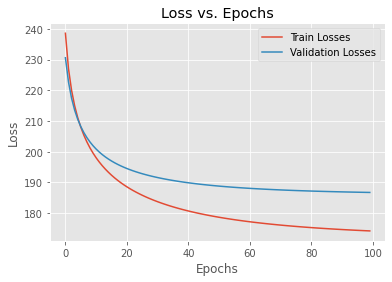

In [77]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
plt.plot(train_losses, label='Train Losses')
plt.plot(val_losses, label='Validation Losses')
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show();

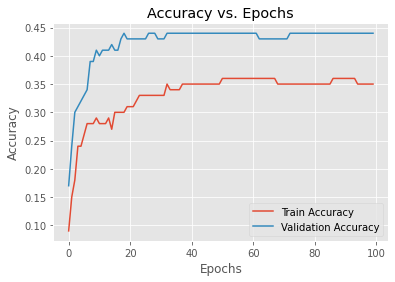

In [78]:
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

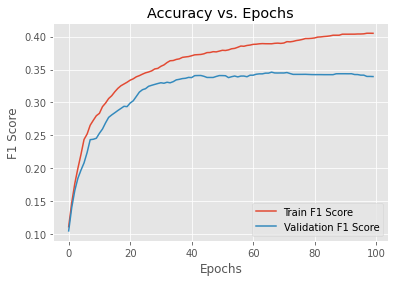

In [79]:
plt.plot(train_f1, label='Train F1 Score')
plt.plot(val_f1, label='Validation F1 Score')
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show();

In [80]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
confusion = np.zeros((10, 10))
total_loss = 0
with tqdm.tqdm(enumerate(test_sampler), total=len(test_sampler)) as pbar:
    for i, (x, y) in pbar:
        logprobs = best_model._forward(x)
        loss = criterion._forward(logprobs=logprobs, targets=y)
        total_loss += loss
        preds = np.argmax(logprobs, axis=1)
        update_confusion_matrix(conf_matrix=confusion, preds=preds, reals=y)
        acc = np.sum((preds == y).astype(int))/len(preds)
        f1 = f1_score(confusion_matrix=confusion)
        pbar.set_description(f'Test   | Loss: {total_loss:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')

Test   | Loss: 1.86e+03 | Acc: 0.41| F1: 0.36|: 100%|██████████| 10/10 [00:00<00:00, 172.41it/s]


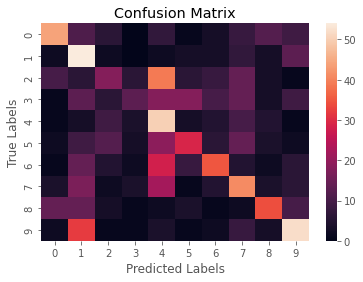

In [81]:
sn.heatmap(confusion)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


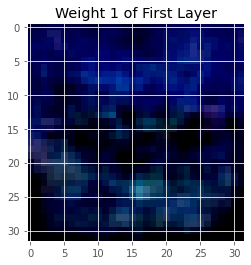

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


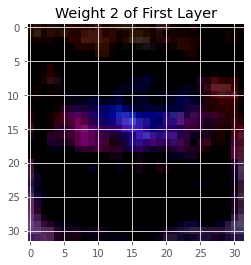

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


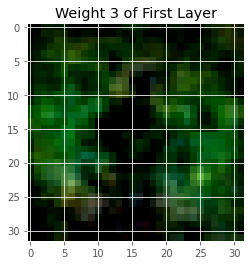

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


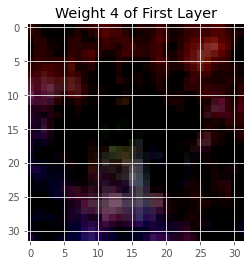

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


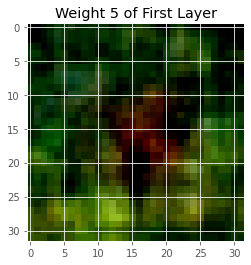

In [30]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 5
first_layer = model.get_parameters()[0]
w = first_layer.params['W']
w = w.reshape((-1, 32, 32, 3))
for i in range(5):
    plt.figure()
    plt.title(f"Weight {i+1} of First Layer")
    plt.imshow(w[i])
    plt.show()